In [23]:
import pandas as pd
import matplotlib.pyplot as plt

import h2o
from h2o.estimators.deeplearning import H2OAutoEncoderEstimator, H2ODeepLearningEstimator

In [24]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,4 mins 02 secs
H2O_cluster_timezone:,Asia/Karachi
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.4
H2O_cluster_version_age:,1 month and 17 days
H2O_cluster_name:,H2O_from_python_hassa_pndzel
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.553 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [25]:
df = h2o.upload_file("creditcard.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [26]:
df

Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.35981,-0.0727812,2.53635,1.37816,-0.338321,0.462388,0.239599,0.0986979,0.363787,0.0907942,-0.5516,-0.617801,-0.99139,-0.311169,1.46818,-0.470401,0.207971,0.0257906,0.403993,0.251412,-0.0183068,0.277838,-0.110474,0.0669281,0.128539,-0.189115,0.133558,-0.0210531,149.62,0
0,1.19186,0.266151,0.16648,0.448154,0.0600176,-0.0823608,-0.078803,0.0851017,-0.255425,-0.166974,1.61273,1.06524,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.0690831,-0.225775,-0.638672,0.101288,-0.339846,0.16717,0.125895,-0.0089831,0.0147242,2.69,0
1,-1.35835,-1.34016,1.77321,0.37978,-0.503198,1.8005,0.791461,0.247676,-1.51465,0.207643,0.624501,0.0660837,0.717293,-0.165946,2.34586,-2.89008,1.10997,-0.121359,-2.26186,0.52498,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.0553528,-0.0597518,378.66,0
1,-0.966272,-0.185226,1.79299,-0.863291,-0.0103089,1.2472,0.237609,0.377436,-1.38702,-0.0549519,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.05965,-0.684093,1.96578,-1.23262,-0.208038,-0.1083,0.0052736,-0.190321,-1.17558,0.647376,-0.221929,0.0627228,0.0614576,123.5,0
2,-1.15823,0.877737,1.54872,0.403034,-0.407193,0.0959215,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.34585,-1.11967,0.175121,-0.451449,-0.237033,-0.0381948,0.803487,0.408542,-0.0094307,0.798278,-0.137458,0.141267,-0.20601,0.502292,0.219422,0.215153,69.99,0
2,-0.425966,0.960523,1.14111,-0.168252,0.420987,-0.0297276,0.476201,0.260314,-0.568671,-0.371407,1.34126,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.0581328,0.0686531,-0.0331938,0.0849677,-0.208254,-0.559825,-0.0263977,-0.371427,-0.232794,0.105915,0.253844,0.0810803,3.67,0
4,1.22966,0.141004,0.0453708,1.20261,0.191881,0.272708,-0.005159,0.0812129,0.46496,-0.0992543,-1.41691,-0.153826,-0.751063,0.167372,0.0501436,-0.443587,0.00282051,-0.611987,-0.045575,-0.219633,-0.167716,-0.27071,-0.154104,-0.780055,0.750137,-0.257237,0.0345074,0.00516777,4.99,0
7,-0.644269,1.41796,1.07438,-0.492199,0.948934,0.428118,1.12063,-3.80786,0.615375,1.24938,-0.619468,0.291474,1.75796,-1.32387,0.686133,-0.076127,-1.22213,-0.358222,0.324505,-0.156742,1.94347,-1.01545,0.0575035,-0.649709,-0.415267,-0.0516343,-1.20692,-1.08534,40.8,0
7,-0.894286,0.286157,-0.113192,-0.271526,2.6696,3.72182,0.370145,0.851084,-0.392048,-0.41043,-0.705117,-0.110452,-0.286254,0.0743554,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.0527357,-0.0734251,-0.268092,-0.204233,1.01159,0.373205,-0.384157,0.0117474,0.142404,93.2,0
9,-0.338262,1.11959,1.04437,-0.222187,0.499361,-0.246761,0.651583,0.0695386,-0.736727,-0.366846,1.01761,0.83639,1.00684,-0.443523,0.150219,0.739453,-0.54098,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.38505,-0.069733,0.0941988,0.246219,0.0830756,3.68,0


In [27]:
df= df.drop(['Time'], axis=1)

In [6]:
df

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
-1.35981,-0.0727812,2.53635,1.37816,-0.338321,0.462388,0.239599,0.0986979,0.363787,0.0907942,-0.5516,-0.617801,-0.99139,-0.311169,1.46818,-0.470401,0.207971,0.0257906,0.403993,0.251412,-0.0183068,0.277838,-0.110474,0.0669281,0.128539,-0.189115,0.133558,-0.0210531,149.62,0
1.19186,0.266151,0.16648,0.448154,0.0600176,-0.0823608,-0.078803,0.0851017,-0.255425,-0.166974,1.61273,1.06524,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.0690831,-0.225775,-0.638672,0.101288,-0.339846,0.16717,0.125895,-0.0089831,0.0147242,2.69,0
-1.35835,-1.34016,1.77321,0.37978,-0.503198,1.8005,0.791461,0.247676,-1.51465,0.207643,0.624501,0.0660837,0.717293,-0.165946,2.34586,-2.89008,1.10997,-0.121359,-2.26186,0.52498,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.0553528,-0.0597518,378.66,0
-0.966272,-0.185226,1.79299,-0.863291,-0.0103089,1.2472,0.237609,0.377436,-1.38702,-0.0549519,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.05965,-0.684093,1.96578,-1.23262,-0.208038,-0.1083,0.0052736,-0.190321,-1.17558,0.647376,-0.221929,0.0627228,0.0614576,123.5,0
-1.15823,0.877737,1.54872,0.403034,-0.407193,0.0959215,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.34585,-1.11967,0.175121,-0.451449,-0.237033,-0.0381948,0.803487,0.408542,-0.0094307,0.798278,-0.137458,0.141267,-0.20601,0.502292,0.219422,0.215153,69.99,0
-0.425966,0.960523,1.14111,-0.168252,0.420987,-0.0297276,0.476201,0.260314,-0.568671,-0.371407,1.34126,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.0581328,0.0686531,-0.0331938,0.0849677,-0.208254,-0.559825,-0.0263977,-0.371427,-0.232794,0.105915,0.253844,0.0810803,3.67,0
1.22966,0.141004,0.0453708,1.20261,0.191881,0.272708,-0.005159,0.0812129,0.46496,-0.0992543,-1.41691,-0.153826,-0.751063,0.167372,0.0501436,-0.443587,0.00282051,-0.611987,-0.045575,-0.219633,-0.167716,-0.27071,-0.154104,-0.780055,0.750137,-0.257237,0.0345074,0.00516777,4.99,0
-0.644269,1.41796,1.07438,-0.492199,0.948934,0.428118,1.12063,-3.80786,0.615375,1.24938,-0.619468,0.291474,1.75796,-1.32387,0.686133,-0.076127,-1.22213,-0.358222,0.324505,-0.156742,1.94347,-1.01545,0.0575035,-0.649709,-0.415267,-0.0516343,-1.20692,-1.08534,40.8,0
-0.894286,0.286157,-0.113192,-0.271526,2.6696,3.72182,0.370145,0.851084,-0.392048,-0.41043,-0.705117,-0.110452,-0.286254,0.0743554,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.0527357,-0.0734251,-0.268092,-0.204233,1.01159,0.373205,-0.384157,0.0117474,0.142404,93.2,0
-0.338262,1.11959,1.04437,-0.222187,0.499361,-0.246761,0.651583,0.0695386,-0.736727,-0.366846,1.01761,0.83639,1.00684,-0.443523,0.150219,0.739453,-0.54098,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.38505,-0.069733,0.0941988,0.246219,0.0830756,3.68,0


In [7]:
df.shape

(284807, 30)

In [8]:
train,test = df.split_frame(ratios=[.50])

In [9]:
print(train.shape)
print(test.shape)

(142585, 30)
(142222, 30)


In [10]:
train = train.drop(['Class'], axis=1)

y_test = test['Class']
y_test_df = y_test.as_data_frame()

test = test.drop(['Class'], axis=1)

C:\Users\hassa\AppData\Local\Programs\Python\Python312\Lib\site-packages\h2o\frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [11]:
Autoencoder = h2o.estimators.deeplearning.H2OAutoEncoderEstimator(hidden=[20,15,10,15,20], 
                                                                  epochs=100, 
                                                                  activation='tanh', 
                                                                  autoencoder=True) 
Autoencoder.train(x = train.columns, training_frame = train) 

deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OAutoEncoderEstimator : Deep Learning
Model Key: DeepLearning_model_python_1724704757264_1


Status of Neuron Layers: auto-encoder, gaussian distribution, Quadratic loss, 2,169 weights/biases, 35.4 KB, 3,297,899 training samples, mini-batch size 1
    layer    units    type    dropout    l1    l2    mean_rate             rate_rms              momentum    mean_weight             weight_rms           mean_bias               bias_rms
--  -------  -------  ------  ---------  ----  ----  --------------------  --------------------  ----------  ----------------------  -------------------  ----------------------  -------------------
    1        29       Input   0.0
    2        20       Tanh    0.0        0.0   0.0   0.5977083366492699    0.25685036182403564   0.0         0.0005559453172940392   0.9964544773101807   -0.0006894157750596819  0.1995270848274231
    3        15       Tanh    0.0        0.0   0.0   0.1927240872879823    0.09418502449989319   0.0         -0.015657507540017834   0.28339576721191406  0.1338700594494902      0.41116178035736084
    4        10       Tanh    0.0        0.0   0.0   0.09993114292621613   0.05041079223155975   0.0         -0.03629872913084303    0.3273071050643921   0.020139198709161987    0.3732318878173828
    5        15       Tanh    0.0        0.0   0.0   0.13440809670835732   0.12110236287117004   0.0         0.002372659210426112    0.9431555271148682   0.17806175428877394     0.7007467746734619
    6        20       Tanh    0.0        0.0   0.0   0.14021820529053608   0.09481093287467957   0.0         0.006199198957377424    0.6846165657043457   0.012449980659543846    0.7912585735321045
    7        29       Tanh               0.0   0.0   0.046569861074235164  0.027645163238048553  0.0         0.00034125925314959927  0.0791296660900116   -0.010173873398252788   0.07109206914901733

ModelMetricsAutoEncoder: deeplearning
** Reported on train data. **

MSE: 0.00018083342662454183
RMSE: 0.013447431971366943

Scoring History: 
     timestamp            duration          training_speed    epochs              iterations    samples    training_rmse         training_mse
---  -------------------  ----------------  ----------------  ------------------  ------------  ---------  --------------------  ----------------------
     2024-08-27 01:39:48  1.071 sec         0.00000 obs/sec   0.0                 0             0.0        0.05456234172683758   0.002977049134716201
     2024-08-27 01:39:54  6.890 sec         18181 obs/sec     0.7005505487954553  1             99888.0    0.019784752254975488  0.00039143642179075765
     2024-08-27 01:39:59  12.231 sec        18631 obs/sec     1.4016691797874952  2             199857.0   0.01908347814435645   0.0003641791380861303
     2024-08-27 01:40:04  17.502 sec        18899 obs/sec     2.103559280429218   3             299936.0   0.019416651241180864  0.00037700634542165036
     2024-08-27 01:40:10  22.837 sec        18932 obs/sec     2.806767892835852   4             400203.0   0.01845910991496535   0.00034073873885277214
     2024-08-27 01:40:15  28.006 sec        19104 obs/sec     3.507437668758986   5             500108.0   0.020585670566281963  0.0004237698326634876
     2024-08-27 01:40:20  33.383 sec        19077 obs/sec     4.208822807448189   6             600115.0   0.02028736965160853   0.00041157736738100685
     2024-08-27 01:40:25  38.628 sec        19110 obs/sec     4.907809376862924   7             699780.0   0.017941600250195738  0.0003219010195378237
     2024-08-27 01:40:31  44.176 sec        19006 obs/sec     5.609622330539678   8             799848.0   0.016919684916314494  0.0002862757376673602
     2024-08-27 01:40:37  50.325 sec        18715 obs/sec     6.311168776519269   9             899878.0   0.016734705111243076  0.0002800503551602652
---  ---                  ---               ---               ---                 ---           ---        ---                   ---
     2024-08-27 01:41:59  2 min 11.

In [12]:
print(Autoencoder)

Model Details
H2OAutoEncoderEstimator : Deep Learning
Model Key: DeepLearning_model_python_1724704757264_1


Status of Neuron Layers: auto-encoder, gaussian distribution, Quadratic loss, 2,169 weights/biases, 35.4 KB, 3,297,899 training samples, mini-batch size 1
    layer    units    type    dropout    l1    l2    mean_rate             rate_rms              momentum    mean_weight             weight_rms           mean_bias               bias_rms
--  -------  -------  ------  ---------  ----  ----  --------------------  --------------------  ----------  ----------------------  -------------------  ----------------------  -------------------
    1        29       Input   0.0
    2        20       Tanh    0.0        0.0   0.0   0.5977083366492699    0.25685036182403564   0.0         0.0005559453172940392   0.9964544773101807   -0.0006894157750596819  0.1995270848274231
    3        15       Tanh    0.0        0.0   0.0   0.1927240872879823    0.09418502449989319   0.0         -0.01565750

In [13]:
prediction = Autoencoder.predict(test)

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%


Text(0.5, 0, 'Epoch')

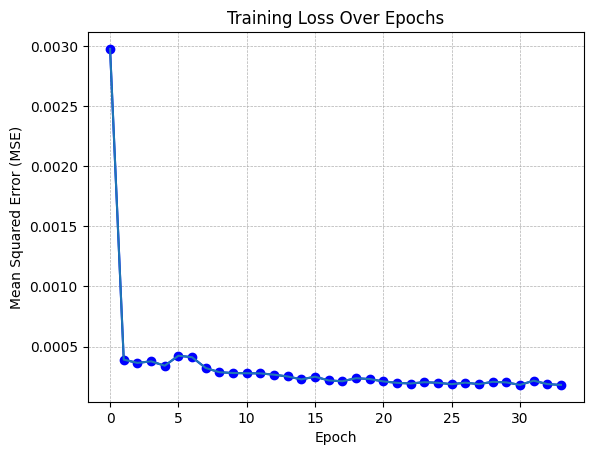

In [14]:
scoring_history = Autoencoder.score_history()
plt.plot(scoring_history['training_mse'], marker='o', linestyle='-', color='b', label='Training MSE')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.plot(scoring_history['training_mse'])
plt.title('Training Loss Over Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.xlabel('Epoch')

In [15]:
#econstruction error for the test dataset using the trained autoencoder
test_rec_error = Autoencoder.anomaly(test)
test_rec_error_df = test_rec_error.as_data_frame()

C:\Users\hassa\AppData\Local\Programs\Python\Python312\Lib\site-packages\h2o\frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [16]:
test_rec_error_df

,Reconstruction.MSE
0,0.000095
1,0.000018
2,0.000130
3,0.000075
4,0.000038
...,...
142217,0.000125
142218,0.001708
142219,0.000043
142220,0.000162


In [17]:
error_df = pd.DataFrame({'reconstruction_error': test_rec_error_df['Reconstruction.MSE'],
                        'true_class': y_test_df['Class']})

In [18]:
error_df

,reconstruction_error,true_class
0,0.000095,0
1,0.000018,0
2,0.000130,0
3,0.000075,0
4,0.000038,0
...,...,...
142217,0.000125,0
142218,0.001708,0
142219,0.000043,0
142220,0.000162,0


In [19]:
error_df.describe()

,reconstruction_error,true_class
count,142222.000000,142222.000000
mean,0.000178,0.001568
std,0.000823,0.039567
min,0.000009,0.000000
25%,0.000048,0.000000
50%,0.000081,0.000000
75%,0.000153,0.000000
max,0.098281,1.000000


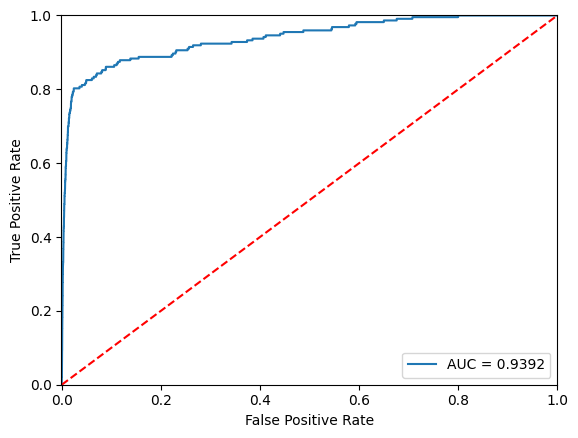

In [20]:
from sklearn.metrics import ( auc,roc_curve,roc_auc_score)


fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)


plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')

plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();